## Rescale images

We are testing the rescaling of the profiles in a consistent way.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gofish import imagecube
import dsharp_helper as dh
import helper_functions
import astropy.units as u

/Users/franceschi/mysims/DISKLAB/disklab/diskradial.py:18: UserWarning: numba not available, opacity calculation will be very slow
  warnings.warn('numba not available, opacity calculation will be very slow')


In [2]:
import importlib
importlib.reload(helper_functions)

<module 'helper_functions' from '/Users/franceschi/mysims/IMLup/Til/helper_functions.py'>

Set the parameters used to process the image

In [3]:
disk = 'IMLup'
PA = dh.sources.loc[disk]['PA']
inc = dh.sources.loc[disk]['inc']
dpc = dh.sources.loc[disk]['distance [pc]']
clip = 5
z0 = 0.2
psi = 1.27
lam_sca = 1.65e-4
pixelsize = (12.5*u.mas).to('deg').value # pixel size
beam_sca = (0.040, 0.040, 0.0) # the "beam" assumed in the radial profile calculation

Read the image and set beam parameters

In [4]:
# fname = 'tmp_lghj4yj/image_sca.fits'
fname = 'IM_Lup_reducedRob_median_Hband_12.25mas_mod.fits'
cube = imagecube(fname)
cube.bmaj, cube.bmin, cube.bpa = beam_sca

Since we re-use these keywords all the time, we pack them in a dictionary

In [5]:
disk_surface = dict(inc=inc, PA=PA, z0=z0, psi=psi)

Define the a mask for testing

In [6]:
mask_params = dict(
    r_min=0.95,
    r_max=1.05,
    PA_min=-180,
    PA_max=180,
    )

As a check: plot the mask and the profile and the radial average

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


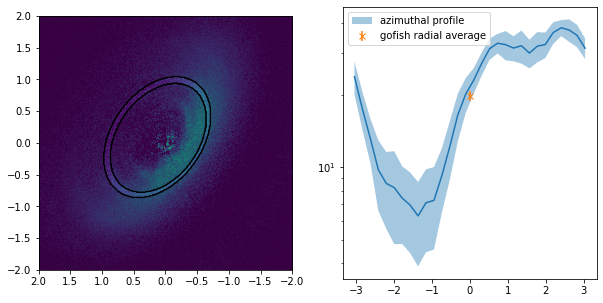

In [7]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

xv, yv, dyv = cube.radial_profile(rbins=np.array([mask_params['r_min'], mask_params['r_max']]), **mask_params, **disk_surface)

x, y, dy = helper_functions.azimuthal_profile(cube, **mask_params, **disk_surface)

ax[1].semilogy(x, y)
ax[1].errorbar(x.mean(), yv, dyv, fmt='x', label='gofish radial average')
ax[1].fill_between(x, y - dy, y + dy, alpha=0.4, label='azimuthal profile')

ax[0].imshow(cube.data /yv, extent=cube.extent, vmin=0.1, vmax=5, origin='lower')

cube.plot_mask(ax=ax[0], **mask_params, **disk_surface, mask_alpha=0.2)

ax[0].set_xlim([2, -2])
ax[0].set_ylim([-2, 2])
ax[1].legend();

For the following image, we have to re-normalize the data in the same way as the profile functions do it

In [8]:
data = cube.data.copy()
if cube.bunit.lower() == 'jy/beam':
    data *= 1e-23 / cube.beamarea_str
elif cube.bunit.lower() == 'jy/pixel':
    data *= 1e-23 * cube.pix_per_beam / cube.beamarea_str

Now we get the different profiles along the major and minor axes and plot them along with the masks

	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.
	 Reverting to standard azimuthal averaging; will ignore `unit` argument.


/anaconda3/envs/dipsy/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/dipsy/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


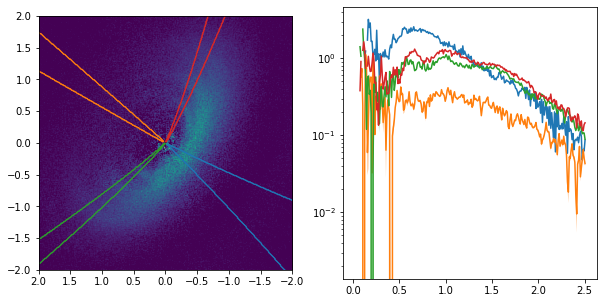

In [9]:
options = dict(clip=clip, beam=beam_sca, **disk_surface)

profiles = helper_functions.get_normalized_profiles(fname, **options)
norm = profiles['T']['norm']

f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(data / norm, extent=cube.extent, vmin=0.1, vmax=5, origin='lower')

for i, key in enumerate(profiles.keys()):
    profile = profiles[key]
    x = profile['x']
    y = profile['y']
    dy = profile['dy']
    mask = profile['mask']

    cube.plot_mask(ax=ax[0], **disk_surface, **mask, mask_alpha=0, mask_color=f'C{i}')
    
    ax[1].semilogy(x, y, c=f'C{i}')
    ax[1].fill_between(x, y - dy, y + dy, fc=f'C{i}', alpha=0.5)

ax[0].set_xlim([2, -2])
ax[0].set_ylim([-2, 2]);